# Analysis of Resume data

## Setup Google colab

In [1]:
!bash setup.sh

Cloning into 'datartistry'...
remote: Enumerating objects: 988, done.
remote: Counting objects: 100% (988/988), done.
remote: Compressing objects: 100% (966/966), done.
remote: Total 3613 (delta 23), reused 963 (delta 12), pack-reused 2625
Receiving objects: 100% (3613/3613), 350.96 MiB | 28.19 MiB/s, done.
Resolving deltas: 100% (484/484), done.
Checking out files: 100% (4075/4075), done.


In [2]:
%cd datartistry

/content/datartistry


In [3]:
!git checkout -b modeling
!git push -u origin modeling

Switched to a new branch 'modeling'
Total 0 (delta 0), reused 0 (delta 0)
remote: 
remote: Create a pull request for 'modeling' on GitHub by visiting:
remote:      https://github.com/Inventrohyder/datartistry/pull/new/modeling
remote: 
To github.com:Inventrohyder/datartistry.git
 * [new branch]      modeling -> modeling
Branch 'modeling' set up to track remote branch 'modeling' from 'origin'.


## Begin Analysis

In [4]:
import os
import pandas as pd

In [5]:
# list all txt files
path = '/content/datartistry/ResumeParser/data/output/'

files = []       # Store the file paths
categories = []  # Store the job category of each file
text = []        # Store the actual text data
num_words = []   # Count the number of words in each file

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
          file_path = os.path.join(r, file)
          files.append(file_path)

          category = file.split('-')[0]
          categories.append(category)

          with open(file_path) as text_file:
            data = text_file.read()
            text.append(data)
            words = data.split()
            num_words.append(len(words))

df = pd.DataFrame(
    {
     "category": categories, 
     "file_path": files, 
     "len_words": num_words,
     "text": text
     }
)
df.head()

,category,file_path,len_words,text
0,fund_accounting,/content/datartistry/ResumeParser/data/output/...,679,QIAN BOWEN\n\nMobile: + 65 9060 7342\n\nEmail:...
1,fund_accounting,/content/datartistry/ResumeParser/data/output/...,871,Dina V. Nagao \n\n E: DinaVNagao@gmail.com ...
2,corporate_secretary,/content/datartistry/ResumeParser/data/output/...,710,\n\n \n \nEXPERIENCE \n\n \n\n \n\n \n\n \n\n...
3,sales,/content/datartistry/ResumeParser/data/output/...,559,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nYee Ch...
4,sales,/content/datartistry/ResumeParser/data/output/...,501,"Terence Neo\n\nSingaporean Chinese, born 1985\..."


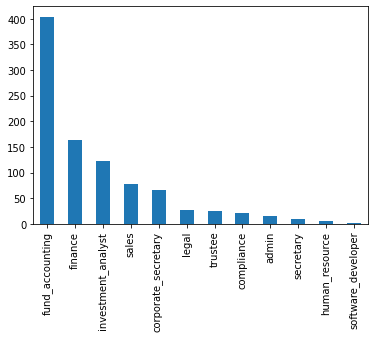

In [6]:
# Counts of job categories
df['category'].value_counts().plot(kind='bar')

In [32]:
df['category'].value_counts()

fund_accounting        404
finance                163
investment_analyst     123
sales                   77
corporate_secretary     66
legal                   26
trustee                 24
compliance              21
admin                   16
secretary                9
human_resource           6
software_developer       1
Name: category, dtype: int64

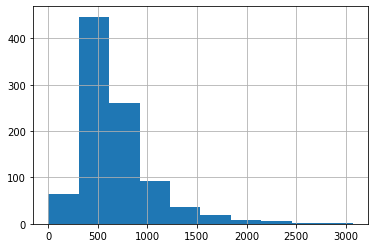

In [7]:
# Histogram of the length of a resume
df['len_words'].hist()

In [8]:
# Descriptive stats of the length of a resume
df.describe()

,len_words
count,936.000000
mean,669.694444
std,371.604376
min,0.000000
25%,437.750000
50%,574.000000
75%,781.000000
max,3071.000000


In [9]:
df['text'][0]

'QIAN BOWEN\n\nMobile: + 65 9060 7342\n\nEmail: qianbowen@yahoo.com\n\nSUMMARY\n\n\uf0b7\n\nSenior Manager with the Financial Services Assurance in PricewaterhouseCoopers\nLLP , Singapore (PwC)\n\n\uf0b7 Over 11 years of experience with PwC, providing assurance services to clients in a wide\n\nrange of industries with focus on asset and wealth management industry\n\n\uf0b7 Proficient in leading engagement teams in the design of effective walk-through and\nreview of financial and operational internal controls across a spectrum of the fund\nmanagement company’s business activities, such as Portfolio management and trade\nexecution, Pricing and valuation, Client administration and reporting, and Fund\naccounting.\n\n\uf0b7 Excellent in client relationship management and project management with an audit\n\nportfolio comprising 8-12 clients and over $1 million annual audit fee revenue\n\n\uf0b7 Good knowledge in asset management rules and regulations in Singapore ，\nexperience in MAS/CPFIS/

In [10]:
print(df['text'][0])

QIAN BOWEN

Mobile: + 65 9060 7342

Email: qianbowen@yahoo.com

SUMMARY



Senior Manager with the Financial Services Assurance in PricewaterhouseCoopers
LLP , Singapore (PwC)

 Over 11 years of experience with PwC, providing assurance services to clients in a wide

range of industries with focus on asset and wealth management industry

 Proficient in leading engagement teams in the design of effective walk-through and
review of financial and operational internal controls across a spectrum of the fund
management company’s business activities, such as Portfolio management and trade
execution, Pricing and valuation, Client administration and reporting, and Fund
accounting.

 Excellent in client relationship management and project management with an audit

portfolio comprising 8-12 clients and over $1 million annual audit fee revenue

 Good knowledge in asset management rules and regulations in Singapore ，
experience in MAS/CPFIS/CCIS compliance review for licensed and registered fun

## Clean data

In [11]:
import re

In [19]:
def strip(text_to_clean):
  # Replace all newlines and blanklines with special strings
  regx = re.compile(r"\n\n")
  text_to_clean = regx.sub(repl=" blankline ", string=text_to_clean)
 
  regx = re.compile(r"\n")
  text_to_clean = regx.sub(repl=" newline ", string=text_to_clean)


  # Make all white space a single space
  regx = re.compile(r"\s+")
  text_to_clean = regx.sub(repl=" ", string=text_to_clean)

  # Remove any trailing or leading white space
  text_to_clean = text_to_clean.strip(" ")
  return text_to_clean

In [20]:
df['text'][0]

'QIAN BOWEN\n\nMobile: + 65 9060 7342\n\nEmail: qianbowen@yahoo.com\n\nSUMMARY\n\n\uf0b7\n\nSenior Manager with the Financial Services Assurance in PricewaterhouseCoopers\nLLP , Singapore (PwC)\n\n\uf0b7 Over 11 years of experience with PwC, providing assurance services to clients in a wide\n\nrange of industries with focus on asset and wealth management industry\n\n\uf0b7 Proficient in leading engagement teams in the design of effective walk-through and\nreview of financial and operational internal controls across a spectrum of the fund\nmanagement company’s business activities, such as Portfolio management and trade\nexecution, Pricing and valuation, Client administration and reporting, and Fund\naccounting.\n\n\uf0b7 Excellent in client relationship management and project management with an audit\n\nportfolio comprising 8-12 clients and over $1 million annual audit fee revenue\n\n\uf0b7 Good knowledge in asset management rules and regulations in Singapore ，\nexperience in MAS/CPFIS/

In [22]:
print(df['text'][0])

QIAN BOWEN

Mobile: + 65 9060 7342

Email: qianbowen@yahoo.com

SUMMARY



Senior Manager with the Financial Services Assurance in PricewaterhouseCoopers
LLP , Singapore (PwC)

 Over 11 years of experience with PwC, providing assurance services to clients in a wide

range of industries with focus on asset and wealth management industry

 Proficient in leading engagement teams in the design of effective walk-through and
review of financial and operational internal controls across a spectrum of the fund
management company’s business activities, such as Portfolio management and trade
execution, Pricing and valuation, Client administration and reporting, and Fund
accounting.

 Excellent in client relationship management and project management with an audit

portfolio comprising 8-12 clients and over $1 million annual audit fee revenue

 Good knowledge in asset management rules and regulations in Singapore ，
experience in MAS/CPFIS/CCIS compliance review for licensed and registered fun

In [21]:
strip(df['text'][0])

'QIAN BOWEN blankline Mobile: + 65 9060 7342 blankline Email: qianbowen@yahoo.com blankline SUMMARY blankline \uf0b7 blankline Senior Manager with the Financial Services Assurance in PricewaterhouseCoopers newline LLP , Singapore (PwC) blankline \uf0b7 Over 11 years of experience with PwC, providing assurance services to clients in a wide blankline range of industries with focus on asset and wealth management industry blankline \uf0b7 Proficient in leading engagement teams in the design of effective walk-through and newline review of financial and operational internal controls across a spectrum of the fund newline management company’s business activities, such as Portfolio management and trade newline execution, Pricing and valuation, Client administration and reporting, and Fund newline accounting. blankline \uf0b7 Excellent in client relationship management and project management with an audit blankline portfolio comprising 8-12 clients and over $1 million annual audit fee revenue bl

In [24]:
df['cleaned_text'] = df['text'].apply(strip)

In [25]:
df.head()

,category,file_path,len_words,text,cleaned_text
0,fund_accounting,/content/datartistry/ResumeParser/data/output/...,679,QIAN BOWEN\n\nMobile: + 65 9060 7342\n\nEmail:...,QIAN BOWEN blankline Mobile: + 65 9060 7342 bl...
1,fund_accounting,/content/datartistry/ResumeParser/data/output/...,871,Dina V. Nagao \n\n E: DinaVNagao@gmail.com ...,Dina V. Nagao blankline E: DinaVNagao@gmail.co...
2,corporate_secretary,/content/datartistry/ResumeParser/data/output/...,710,\n\n \n \nEXPERIENCE \n\n \n\n \n\n \n\n \n\n...,blankline newline newline EXPERIENCE blankline...
3,sales,/content/datartistry/ResumeParser/data/output/...,559,\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nYee Ch...,blankline blankline blankline blankline blankl...
4,sales,/content/datartistry/ResumeParser/data/output/...,501,"Terence Neo\n\nSingaporean Chinese, born 1985\...","Terence Neo blankline Singaporean Chinese, bor..."


In [26]:
df['cleaned_text'][0]

'QIAN BOWEN blankline Mobile: + 65 9060 7342 blankline Email: qianbowen@yahoo.com blankline SUMMARY blankline \uf0b7 blankline Senior Manager with the Financial Services Assurance in PricewaterhouseCoopers newline LLP , Singapore (PwC) blankline \uf0b7 Over 11 years of experience with PwC, providing assurance services to clients in a wide blankline range of industries with focus on asset and wealth management industry blankline \uf0b7 Proficient in leading engagement teams in the design of effective walk-through and newline review of financial and operational internal controls across a spectrum of the fund newline management company’s business activities, such as Portfolio management and trade newline execution, Pricing and valuation, Client administration and reporting, and Fund newline accounting. blankline \uf0b7 Excellent in client relationship management and project management with an audit blankline portfolio comprising 8-12 clients and over $1 million annual audit fee revenue bl

In [28]:
df[['category', 'cleaned_text']].to_csv('/content/datartistry/to_modeling.csv')